## Capstone Project Data Notebook

In [1]:
#Import needed dependencies
import requests 
import pandas as pd 
import numpy as np
import csv
import seaborn as sns
from sklearn.linear_model import LinearRegression

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium # map rendering library
import folium


     |████████████████████████████████| 102kB 17.6MB/s ta 0:00:01


In [2]:
#Define Foursquare credentials and version
CLIENT_ID = 'WI3VANFJXROYGCKHE5JDVDB3GPY4EBTF24IMDW1RBBJSRBSQ' # your Foursquare ID
CLIENT_SECRET = 'KJEHAZKT1JLOSJJML1II0EMAIDVZMFELUVWPHJWOL4FGBV0L' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30


###Exploratory Data Analysis of FourSquare Data

In [3]:
#Define the user_agent for the geocoder, define target location
addressA = '6625 Coachlight Dr, West Des Moines, IA' 
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(addressA)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)


41.56517202030488 -93.79879121317022


In [4]:
# define the URL for Foursquare for Pizza search
search_query = 'pizza'
radius = 10000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [5]:
#Get results for pizza
results_pizza = requests.get(url).json()
results_pizza

{'meta': {'code': 200, 'requestId': '5ecda151d03993001b0628ec'},
 'response': {'venues': [{'id': '5b2b0fa6b5cb76002cef5494',
    'name': 'Blaze Pizza',
    'location': {'address': '6305 Mills Civic Pkwy, Building 4000 Suite 4200',
     'lat': 41.561832,
     'lng': -93.79546500000001,
     'labeledLatLngs': [{'label': 'display',
       'lat': 41.561832,
       'lng': -93.79546500000001},
      {'label': 'entrance', 'lat': 41.561745, 'lng': -93.795585}],
     'distance': 463,
     'postalCode': '50266',
     'cc': 'US',
     'city': 'West Des Moines',
     'state': 'IA',
     'country': 'United States',
     'formattedAddress': ['6305 Mills Civic Pkwy, Building 4000 Suite 4200',
      'West Des Moines, IA 50266',
      'United States']},
    'categories': [{'id': '52e81612bcbc57f1066b7a00',
      'name': 'Comfort Food Restaurant',
      'pluralName': 'Comfort Food Restaurants',
      'shortName': 'Comfort Food',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/defau

In [6]:
#Assign the relevant part of JSON to venues for pizza results
venues=results_pizza['response']['venues']

In [7]:
#Transform venues into a dataframe for pizza places
pizza = json_normalize(venues)
pizza.head()


,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '52e81612bcbc57f1066b7a00', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,False,5b2b0fa6b5cb76002cef5494,"6305 Mills Civic Pkwy, Building 4000 Suite 4200",...,463,"[6305 Mills Civic Pkwy, Building 4000 Suite 42...","[{'label': 'display', 'lat': 41.561832, 'lng':...",41.561832,-93.795465,50266,IA,Blaze Pizza,v-1590534598,NaN
1,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",NaN,NaN,NaN,NaN,NaN,NaN,False,4c87f205bf40a1cd0bf008b4,6750 Westown Pkwy,...,3294,"[6750 Westown Pkwy (at Lake Dr), West Des Moin...","[{'label': 'display', 'lat': 41.594633, 'lng':...",41.594633,-93.802582,50266,IA,Northern Lights Pizza,v-1590534598,575488127
2,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",NaN,NaN,NaN,NaN,NaN,NaN,False,4e4d4ebbbd413c4cc6701352,"101 Jordan Creek Pkwy, Sp 12500",...,662,"[101 Jordan Creek Pkwy, Sp 12500 (Jordan Creek...","[{'label': 'display', 'lat': 41.5693989, 'lng'...",41.569399,-93.804395,50266,IA,Villa Pizza,v-1590534598,NaN
3,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",NaN,NaN,NaN,NaN,NaN,NaN,False,4f67711ce4b03be105c90c8d,5405 Mills Civic Parkway,...,1666,"[5405 Mills Civic Parkway (In Target), West De...","[{'label': 'display', 'lat': 41.56180477634250...",41.561805,-93.779300,50266,IA,Pizza Hut Express,v-1590534598,NaN
4,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",1440914,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/taste-of-ne...,False,5400cd6a498ed107bea9440b,165 S Jordan Creek Pkwy,...,1039,"[165 S Jordan Creek Pkwy (Bridgewood Blvd), We...","[{'label': 'display', 'lat': 41.56716108531508...",41.567161,-93.810987,50266,IA,Taste of New York Pizza,v-1590534598,NaN


In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in pizza.columns if col.startswith('location.')] + ['id']
pizza_filtered = pizza.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
pizza_filtered['categories'] = pizza_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
pizza_filtered.columns = [column.split('.')[-1] for column in pizza_filtered.columns]

pizza_filtered.shape

(30, 15)

In [9]:
pizza_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Blaze Pizza,Comfort Food Restaurant,"6305 Mills Civic Pkwy, Building 4000 Suite 4200",US,West Des Moines,United States,NaN,463,"[6305 Mills Civic Pkwy, Building 4000 Suite 42...","[{'label': 'display', 'lat': 41.561832, 'lng':...",41.561832,-93.795465,50266,IA,5b2b0fa6b5cb76002cef5494
1,Northern Lights Pizza,Pizza Place,6750 Westown Pkwy,US,West Des Moines,United States,at Lake Dr,3294,"[6750 Westown Pkwy (at Lake Dr), West Des Moin...","[{'label': 'display', 'lat': 41.594633, 'lng':...",41.594633,-93.802582,50266,IA,4c87f205bf40a1cd0bf008b4
2,Villa Pizza,Pizza Place,"101 Jordan Creek Pkwy, Sp 12500",US,West Des Moines,United States,Jordan Creek Mall,662,"[101 Jordan Creek Pkwy, Sp 12500 (Jordan Creek...","[{'label': 'display', 'lat': 41.5693989, 'lng'...",41.569399,-93.804395,50266,IA,4e4d4ebbbd413c4cc6701352
3,Pizza Hut Express,Pizza Place,5405 Mills Civic Parkway,US,West Des Moines,United States,In Target,1666,"[5405 Mills Civic Parkway (In Target), West De...","[{'label': 'display', 'lat': 41.56180477634250...",41.561805,-93.779300,50266,IA,4f67711ce4b03be105c90c8d
4,Taste of New York Pizza,Pizza Place,165 S Jordan Creek Pkwy,US,West Des Moines,United States,Bridgewood Blvd,1039,"[165 S Jordan Creek Pkwy (Bridgewood Blvd), We...","[{'label': 'display', 'lat': 41.56716108531508...",41.567161,-93.810987,50266,IA,5400cd6a498ed107bea9440b


In [10]:
#Create a map of the different restaurant types, centered around the target location 
loc_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

# add a red circle marker to represent the target location
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Location',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(loc_map)

# add the pizza restaurants as blue circle markers
for lat, lng, label in zip(pizza_filtered.lat, pizza_filtered.lng, pizza_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(loc_map)

# display map
loc_map


In [11]:
# define the URL for Foursquare for Mexican restaurants
search_query = 'Mexican'
radius = 10000
urlB = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [12]:
#Get results for Mexican restaurants
results_mex = requests.get(urlB).json()
results_mex

{'meta': {'code': 200, 'requestId': '5ecda21377af03001b7f1915'},
 'response': {'venues': [{'id': '4b624b23f964a520c6402ae3',
    'name': 'On The Border Mexican Grill & Cantina',
    'location': {'address': '140 S Jordan Creek Pkwy',
     'crossStreet': 'Jordan Creek Town Center',
     'lat': 41.5663388,
     'lng': -93.8046465,
     'labeledLatLngs': [{'label': 'display',
       'lat': 41.5663388,
       'lng': -93.8046465},
      {'label': 'entrance', 'lat': 41.566334, 'lng': -93.804634}],
     'distance': 504,
     'postalCode': '50266',
     'cc': 'US',
     'city': 'West Des Moines',
     'state': 'IA',
     'country': 'United States',
     'formattedAddress': ['140 S Jordan Creek Pkwy (Jordan Creek Town Center)',
      'West Des Moines, IA 50266',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1c1941735',
      'name': 'Mexican Restaurant',
      'pluralName': 'Mexican Restaurants',
      'shortName': 'Mexican',
      'icon': {'prefix': 'https://ss3.4sqi.net/im

In [13]:
#Assign the relevant part of JSON to venues for Mexican restaurants
venues_mex=results_mex['response']['venues']

In [14]:
#Transform venues into a dataframe for Mexican restaurants
mexican = json_normalize(venues_mex)
mexican.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",704917,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/on-the-bord...,False,4b624b23f964a520c6402ae3,140 S Jordan Creek Pkwy,...,504,[140 S Jordan Creek Pkwy (Jordan Creek Town Ce...,"[{'label': 'display', 'lat': 41.5663388, 'lng'...",41.566339,-93.804647,50266,IA,On The Border Mexican Grill & Cantina,v-1590534618,NaN
1,"[{'id': '4bf58dd8d48988d153941735', 'name': 'B...",NaN,NaN,NaN,NaN,NaN,NaN,False,4b44b76ff964a5203cfa25e3,165 S Jordan Creek Pkwy,...,966,"[165 S Jordan Creek Pkwy, West Des Moines, IA ...","[{'label': 'display', 'lat': 41.56713160350956...",41.567132,-93.810099,50266,IA,Pancheros Mexican Grill,v-1590534618,NaN
2,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",NaN,NaN,NaN,NaN,NaN,NaN,False,561ef03d498e17ea4bb4ef26,490 S 68th St Ste 110,...,303,"[490 S 68th St Ste 110, West Des Moines, IA 50...","[{'label': 'display', 'lat': 41.56248261570874...",41.562483,-93.799377,50266,IA,Chipotle Mexican Grill,v-1590534618,NaN
3,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",NaN,NaN,NaN,NaN,NaN,NaN,False,52213c7611d230e73c267a82,5014 Ep True Pkwy,...,2283,"[5014 Ep True Pkwy, West Des Moines, IA 50265,...","[{'label': 'display', 'lat': 41.57125324361082...",41.571253,-93.772607,50265,IA,5 de Mayo Mexican Restaurant,v-1590534618,NaN
4,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",1500868,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/monterrey-m...,False,4b5dd52ff964a520766e29e3,6630 Mills Civic Pkwy,...,549,"[6630 Mills Civic Pkwy, West Des Moines, IA 50...","[{'label': 'display', 'lat': 41.56023996073374...",41.560240,-93.798861,50266,IA,Monterrey Mexican Restaurant,v-1590534618,NaN


In [15]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in mexican.columns if col.startswith('location.')] + ['id']
mexican_filtered = mexican.loc[:, filtered_columns]


# filter the category for each row
mexican_filtered['categories'] = mexican_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
mexican_filtered.columns = [column.split('.')[-1] for column in mexican_filtered.columns]

mexican_filtered.shape

(27, 15)

In [16]:
mexican_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,On The Border Mexican Grill & Cantina,Mexican Restaurant,140 S Jordan Creek Pkwy,US,West Des Moines,United States,Jordan Creek Town Center,504,[140 S Jordan Creek Pkwy (Jordan Creek Town Ce...,"[{'label': 'display', 'lat': 41.5663388, 'lng'...",41.566339,-93.804647,50266,IA,4b624b23f964a520c6402ae3
1,Pancheros Mexican Grill,Burrito Place,165 S Jordan Creek Pkwy,US,West Des Moines,United States,NaN,966,"[165 S Jordan Creek Pkwy, West Des Moines, IA ...","[{'label': 'display', 'lat': 41.56713160350956...",41.567132,-93.810099,50266,IA,4b44b76ff964a5203cfa25e3
2,Chipotle Mexican Grill,Mexican Restaurant,490 S 68th St Ste 110,US,West Des Moines,United States,NaN,303,"[490 S 68th St Ste 110, West Des Moines, IA 50...","[{'label': 'display', 'lat': 41.56248261570874...",41.562483,-93.799377,50266,IA,561ef03d498e17ea4bb4ef26
3,5 de Mayo Mexican Restaurant,Mexican Restaurant,5014 Ep True Pkwy,US,West Des Moines,United States,NaN,2283,"[5014 Ep True Pkwy, West Des Moines, IA 50265,...","[{'label': 'display', 'lat': 41.57125324361082...",41.571253,-93.772607,50265,IA,52213c7611d230e73c267a82
4,Monterrey Mexican Restaurant,Mexican Restaurant,6630 Mills Civic Pkwy,US,West Des Moines,United States,NaN,549,"[6630 Mills Civic Pkwy, West Des Moines, IA 50...","[{'label': 'display', 'lat': 41.56023996073374...",41.560240,-93.798861,50266,IA,4b5dd52ff964a520766e29e3


In [17]:
# add the Mexican restaurants as green circle markers to the map
for lat, lng, label in zip(mexican_filtered.lat, mexican_filtered.lng, mexican_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(loc_map)

# display map
loc_map

In [18]:
# define the URL for Foursquare for Chinese restaurants
search_query = 'Chinese'
radius = 10000
urlC = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [19]:
#Get results for Chinese restaurants
results_chin = requests.get(urlC).json()
results_chin

{'meta': {'code': 200, 'requestId': '5ecda1630cc1fd001b78938b'},
 'response': {'venues': [{'id': '5686f70d498edeff79146eb0',
    'name': 'Chinese Meridians Acupressure & Backrubs',
    'location': {'address': '101 Jordan Creek Pkwy',
     'crossStreet': 'Jordan Creek Town Center',
     'lat': 41.570092,
     'lng': -93.803767,
     'labeledLatLngs': [{'label': 'display',
       'lat': 41.570092,
       'lng': -93.803767}],
     'distance': 686,
     'postalCode': '50266',
     'cc': 'US',
     'city': 'West Des Moines',
     'state': 'IA',
     'country': 'United States',
     'formattedAddress': ['101 Jordan Creek Pkwy (Jordan Creek Town Center)',
      'West Des Moines, IA 50266',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1ed941735',
      'name': 'Spa',
      'pluralName': 'Spas',
      'shortName': 'Spa',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/spa_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1590

In [20]:
#Assign the relevant part of JSON to venues for Chinese restaurants
venues_chin=results_chin['response']['venues']

In [21]:
#Transform venues into a dataframe for Chinese restaurants
chinese = json_normalize(venues_chin)
chinese.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1ed941735', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,False,5686f70d498edeff79146eb0,101 Jordan Creek Pkwy,...,Jordan Creek Town Center,686,[101 Jordan Creek Pkwy (Jordan Creek Town Cent...,"[{'label': 'display', 'lat': 41.570092, 'lng':...",41.570092,-93.803767,50266,IA,Chinese Meridians Acupressure & Backrubs,v-1590534633
1,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",1325028,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/canton-chin...,False,4b47e0b1f964a520904226e3,5923 Ashworth Rd,...,at 60th St.,2338,"[5923 Ashworth Rd (at 60th St.), West Des Moin...","[{'label': 'display', 'lat': 41.58493113390226...",41.584931,-93.789251,50266,IA,Canton Chinese Restaurant,v-1590534633
2,"[{'id': '52f2ab2ebcbc57f1066b8b3c', 'name': 'M...",NaN,NaN,NaN,NaN,NaN,NaN,False,5bcb5da95c6838002c88df60,2900 University Ave,...,NaN,5913,"[2900 University Ave, West Des Moines, IA 5026...","[{'label': 'display', 'lat': 41.598307, 'lng':...",41.598307,-93.743283,50266,IA,Chinese Foot Reflexology,v-1590534633
3,"[{'id': '4bf58dd8d48988d101941735', 'name': 'M...",NaN,NaN,NaN,NaN,NaN,NaN,False,4cfa741ec51fa1cd03cbe02b,6564 University,...,NaN,8577,"[6564 University, Des Moines, IA 50311, United...","[{'label': 'display', 'lat': 41.60061766004484...",41.600618,-93.707328,50311,IA,Chinese Martial Arts Academy,v-1590534633
4,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",NaN,NaN,NaN,NaN,NaN,NaN,False,4df7a604b0fba21ee54fab14,3800 Merle Hay Rd,...,NaN,10902,"[3800 Merle Hay Rd, Des Moines, IA 50310, Unit...","[{'label': 'display', 'lat': 41.63207395, 'lng...",41.632074,-93.703139,50310,IA,Chinese Gourmet,v-1590534633


In [22]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in chinese.columns if col.startswith('location.')] + ['id']
chinese_filtered = chinese.loc[:, filtered_columns]


# filter the category for each row
chinese_filtered['categories'] = chinese_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
chinese_filtered.columns = [column.split('.')[-1] for column in chinese_filtered.columns]

chinese_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Chinese Meridians Acupressure & Backrubs,Spa,101 Jordan Creek Pkwy,US,West Des Moines,United States,Jordan Creek Town Center,686,[101 Jordan Creek Pkwy (Jordan Creek Town Cent...,"[{'label': 'display', 'lat': 41.570092, 'lng':...",41.570092,-93.803767,50266,IA,5686f70d498edeff79146eb0
1,Canton Chinese Restaurant,Chinese Restaurant,5923 Ashworth Rd,US,West Des Moines,United States,at 60th St.,2338,"[5923 Ashworth Rd (at 60th St.), West Des Moin...","[{'label': 'display', 'lat': 41.58493113390226...",41.584931,-93.789251,50266,IA,4b47e0b1f964a520904226e3
2,Chinese Foot Reflexology,Massage Studio,2900 University Ave,US,West Des Moines,United States,NaN,5913,"[2900 University Ave, West Des Moines, IA 5026...","[{'label': 'display', 'lat': 41.598307, 'lng':...",41.598307,-93.743283,50266,IA,5bcb5da95c6838002c88df60
3,Chinese Martial Arts Academy,Martial Arts Dojo,6564 University,US,Des Moines,United States,NaN,8577,"[6564 University, Des Moines, IA 50311, United...","[{'label': 'display', 'lat': 41.60061766004484...",41.600618,-93.707328,50311,IA,4cfa741ec51fa1cd03cbe02b
4,Chinese Gourmet,Asian Restaurant,3800 Merle Hay Rd,US,Des Moines,United States,NaN,10902,"[3800 Merle Hay Rd, Des Moines, IA 50310, Unit...","[{'label': 'display', 'lat': 41.63207395, 'lng...",41.632074,-93.703139,50310,IA,4df7a604b0fba21ee54fab14


In [23]:
#Remove rows from Chinese dataset that are not restaurants.
chinese_filtered.drop(index=[0], inplace=True)


In [24]:
chinese_filtered.drop(index=[2], inplace=True)
chinese_filtered.drop(index=[3], inplace=True)


In [25]:
chinese_filtered.shape

(6, 15)

In [26]:
# add the Chinese restaurants as purple circle markers to the map
for lat, lng, label in zip(chinese_filtered.lat, chinese_filtered.lng, chinese_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='purple',
        popup=label,
        fill = True,
        fill_color='purple',
        fill_opacity=0.6
    ).add_to(loc_map)

# display map
loc_map

###Exploratory Data Analysis for Economic Data

In [27]:
#Import data files from bls.gov for past 10 quarters of data for Polk County, Iowa, where the bulk of the Des Moines metro area is found.

file_name1='http://data.bls.gov/cew/data/api/2019/3/area/19153.csv'
econQ319=pd.read_csv(file_name1)

file_name2='http://data.bls.gov/cew/data/api/2019/2/area/19153.csv'
econQ219=pd.read_csv(file_name2)

file_name3='http://data.bls.gov/cew/data/api/2019/1/area/19153.csv'
econQ119=pd.read_csv(file_name3)

file_name4='http://data.bls.gov/cew/data/api/2018/4/area/19153.csv'
econQ418=pd.read_csv(file_name4)

file_name5='http://data.bls.gov/cew/data/api/2018/3/area/19153.csv'
econQ318=pd.read_csv(file_name5)

file_name6='http://data.bls.gov/cew/data/api/2018/2/area/19153.csv'
econQ218=pd.read_csv(file_name6)

file_name7='http://data.bls.gov/cew/data/api/2018/1/area/19153.csv'
econQ118=pd.read_csv(file_name7)

file_name8='http://data.bls.gov/cew/data/api/2017/4/area/19153.csv'
econQ417=pd.read_csv(file_name8)

file_name9='http://data.bls.gov/cew/data/api/2017/3/area/19153.csv'
econQ317=pd.read_csv(file_name9)

file_name10='http://data.bls.gov/cew/data/api/2017/2/area/19153.csv'
econQ217=pd.read_csv(file_name10)

In [28]:
#Create new dataframe that adds the Q219 data to the Q319 data
econMerged = econQ319.append(econQ219, ignore_index=True)

In [29]:
#Add the Q119 data to the merged data frame
econMerged2 = econMerged.append(econQ119, ignore_index=True)

In [30]:
#Add the Q418 data to the merged data frame
econMerged3 = econMerged2.append(econQ418, ignore_index=True)

In [31]:
#Add the Q318 data to the merged data frame
econMerged4 = econMerged3.append(econQ318, ignore_index=True)

In [32]:
#Add the Q218 data to the merged data frame
econMerged5 = econMerged4.append(econQ218, ignore_index=True)

In [33]:
#Add the Q118 data to the merged data frame
econMerged6 = econMerged5.append(econQ118, ignore_index=True)

In [34]:
#Add the Q417 data to the merged data frame
econMerged7 = econMerged6.append(econQ417, ignore_index=True)

In [35]:
#Add the Q317 data to the merged data frame
econMerged8 = econMerged7.append(econQ317, ignore_index=True)

In [36]:
#Add the final quarter, Q217 and create the final data frame
econFinal = econMerged8.append(econQ217, ignore_index=True)
econFinal.shape

(19997, 42)

In [37]:
econFinal.head()

,area_fips,own_code,industry_code,agglvl_code,size_code,year,qtr,disclosure_code,qtrly_estabs,month1_emplvl,...,oty_month3_emplvl_chg,oty_month3_emplvl_pct_chg,oty_total_qtrly_wages_chg,oty_total_qtrly_wages_pct_chg,oty_taxable_qtrly_wages_chg,oty_taxable_qtrly_wages_pct_chg,oty_qtrly_contributions_chg,oty_qtrly_contributions_pct_chg,oty_avg_wkly_wage_chg,oty_avg_wkly_wage_pct_chg
0,19153,0,10,70,0,2019,3,NaN,18186,305425,...,1368,0.5,145263464,3.5,53571737,4.9,946589,6.4,32,3.1
1,19153,1,10,71,0,2019,3,NaN,112,5950,...,79,1.3,2257656,2.2,0,0.0,0,0.0,12,0.9
2,19153,1,102,72,0,2019,3,NaN,112,5950,...,79,1.3,2257656,2.2,0,0.0,0,0.0,12,0.9
3,19153,1,1021,73,0,2019,3,NaN,29,2039,...,-2,-0.1,-812684,-2.7,0,0.0,0,0.0,-31,-2.7
4,19153,1,1023,73,0,2019,3,NaN,4,62,...,-2,-3.2,97329,5.6,0,0.0,0,0.0,159,7.4


In [38]:
#Filter data frame to only include needed columns
econ_filtered = econFinal.filter(["industry_code", "year", "qtr", "qtrly_estabs", "avg_wkly_wage"])
econ_filtered.head()

,industry_code,year,qtr,qtrly_estabs,avg_wkly_wage
0,10,2019,3,18186,1078
1,10,2019,3,112,1346
2,102,2019,3,112,1346
3,1021,2019,3,29,1123
4,1023,2019,3,4,2322


In [39]:
#Filter data frame to only have rows related to industry code 7225, for restaurants
numbers=['7225','72251','722511','722513','722514','722515']
econ_filteredRests = econ_filtered[econ_filtered['industry_code'].isin(numbers)]
econ_filteredRests.head()

,industry_code,year,qtr,qtrly_estabs,avg_wkly_wage
310,7225,2019,3,1,0
311,72251,2019,3,1,0
312,722514,2019,3,1,0
1893,7225,2019,3,897,357
1894,72251,2019,3,897,357


In [40]:
#Reset index for data frame
econ_filteredRests.reset_index(drop=True, inplace=True)
econ_filteredRests.head()

,industry_code,year,qtr,qtrly_estabs,avg_wkly_wage
0,7225,2019,3,1,0
1,72251,2019,3,1,0
2,722514,2019,3,1,0
3,7225,2019,3,897,357
4,72251,2019,3,897,357


In [41]:
#Add period column to data frame
econ_filteredRests = econ_filteredRests.assign(Period = [201903,201903,201903,201903,201903,201903,201903,201903,201903,201902,201902,201902,201902,201902,201902,201902,201902,201902,201901,201901,201901,201901,201901,201901,201901,201901,201901,201804,201804,201804,201804,201804,201804,201804,201804,201804,201803,201803,201803,201803,201803,201803,201803,201803,201803,201802,201802,201802,201802,201802,201802,201802,201802,201802,201801,201801,201801,201801,201801,201801,201801,201801,201801,201704,201704,201704,201704,201704,201704,201704,201704,201704,201703,201703,201703,201703,201703,201703,201703,201703,201703,201702,201702,201702,201702,201702,201702,201702,201702,201702
])

In [42]:
econ_filteredRests.head()

,industry_code,year,qtr,qtrly_estabs,avg_wkly_wage,Period
0,7225,2019,3,1,0,201903
1,72251,2019,3,1,0,201903
2,722514,2019,3,1,0,201903
3,7225,2019,3,897,357,201903
4,72251,2019,3,897,357,201903


In [43]:
#create new dataframe grouped by the period
econ_final = econ_filteredRests.groupby(['Period']).sum()
econ_final.head(10)

,year,qtr,qtrly_estabs,avg_wkly_wage
Period,,,,
201702,18153,18,2544,1911
201703,18153,27,2562,1999
201704,18153,36,2568,1991
201801,18162,9,2586,1958
201802,18162,18,2568,1928
201803,18162,27,2583,2008
201804,18162,36,2646,2042
201901,18171,9,2628,1977
201902,18171,18,2667,2021


In [44]:
#drop the year and qtr columns from the data frame
econ = econ_final.drop(['year', 'qtr'], axis=1)

In [45]:
#Use the dtype method to see data type of each column
econ.dtypes

qtrly_estabs     int64
avg_wkly_wage    int64
dtype: object

In [46]:
#Use the describe method to see descriptive statistics regarding the dataframe
econ.describe()

,qtrly_estabs,avg_wkly_wage
count,10.000000,10.000000
mean,2604.600000,1993.800000
std,50.691222,55.751034
min,2544.000000,1911.000000
25%,2568.000000,1962.750000
50%,2584.500000,1995.000000
75%,2641.500000,2017.750000
max,2694.000000,2103.000000


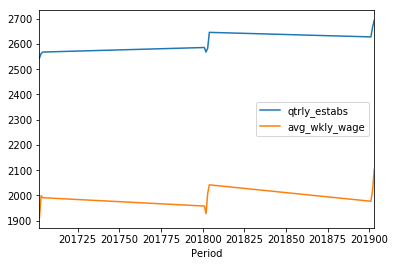

In [47]:
#plot the establishments and wages on a line plot
econ.plot()

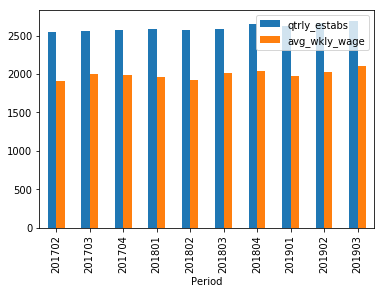

In [49]:
#plot the establishments and wages as a bar chart
econ.plot(kind='bar')

In [50]:
#Is there a correlation between the number of establishments and wages?
econ.corr()

,qtrly_estabs,avg_wkly_wage
qtrly_estabs,1.000000,0.814955
avg_wkly_wage,0.814955,1.000000


In [51]:
#Import stats package from scipy
from scipy import stats

In [52]:
#Calculate Pearson correlation and p value
pearson_coef, p_value=stats.pearsonr(econ['qtrly_estabs'],econ['avg_wkly_wage'])
print("The Pearson cor Coef is", pearson_coef, "with a p value of ", p_value)

The Pearson cor Coef is 0.814954558948397 with a p value of  0.00407612705240444


In [57]:
#Linear Regression
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
#Linear regression
X=econ[['qtrly_estabs']]
Y=econ[['avg_wkly_wage']]
lm.fit(X,Y)
lm.score(X,Y)

0.6641509331507751

In [62]:
#Calculate Growth Rate for Wages
Wages_Growth=((2103-1911)/1911)*100
print("Growth in wages is", Wages_Growth)

Growth in wages is 10.047095761381476


In [63]:
#Calcualte Growth Rate for Establishments
Estab_Growth=((2694-2544)/2544)*100
print("Growth in establishments is", Estab_Growth)

Growth in establishments is 5.89622641509434
